In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/iris.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

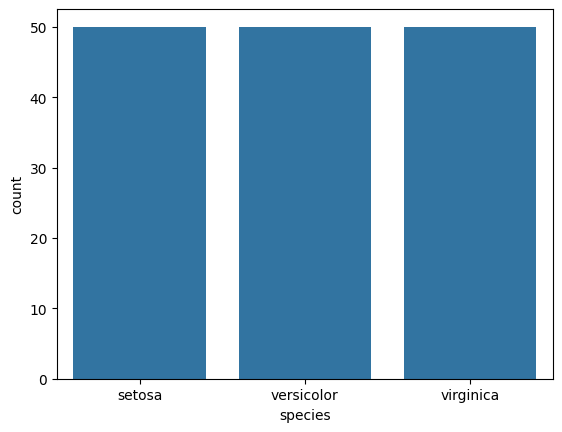

In [8]:
sns.countplot(x='species', data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

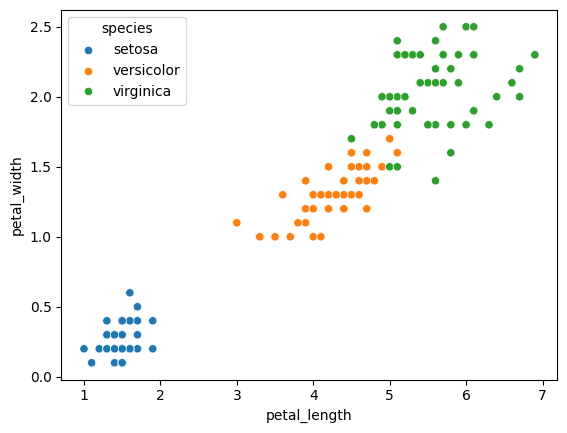

In [9]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')

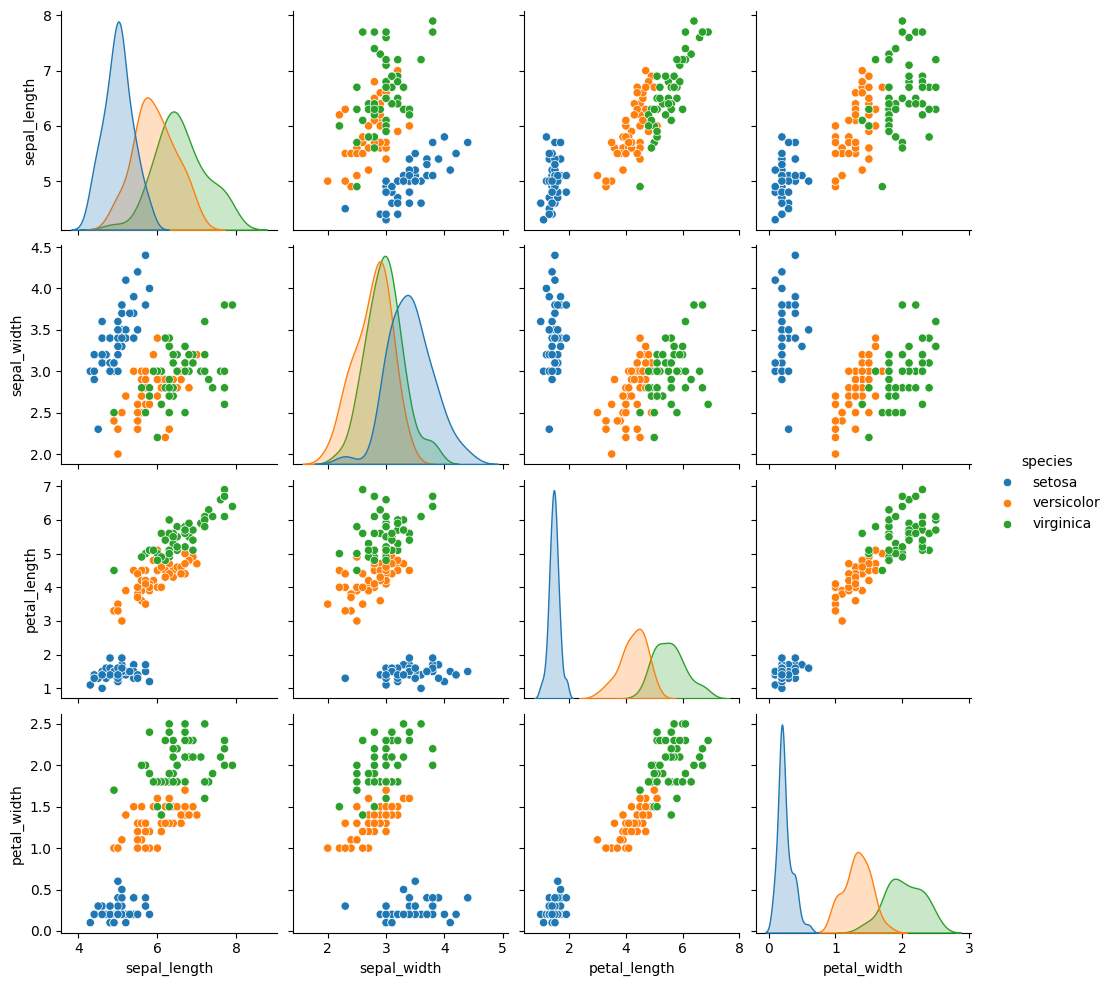

In [10]:
sns.pairplot(df, hue='species')

<Axes: >

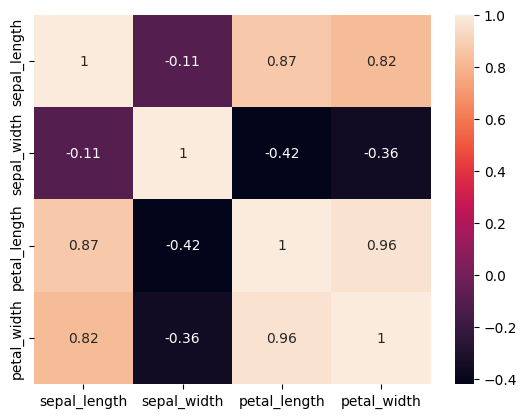

In [11]:
sns.heatmap(df.drop('species', axis=1).corr(), annot=True)

In [12]:
X = df.drop('species', axis=1)
y = df['species']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression(solver='saga', max_iter=5000)

In [38]:
# Настраиваем param_grid
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = [
    {'estimator__penalty': ['l1'], 'estimator__C': C},  # Для l1
    {'estimator__penalty': ['l2'], 'estimator__C': C},  # Для l2
    {'estimator__penalty': ['elasticnet'], 'estimator__C': C, 'estimator__l1_ratio': l1_ratio}  # Для elasticnet
]

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

In [40]:
# Оборачиваем в OneVsRestClassifier
model = GridSearchCV(estimator=OneVsRestClassifier(log_model), param_grid=param_grid, cv=5)

In [41]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                        solver='saga')),
             param_grid=[{'estimator__C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+0...
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                          'estimator__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                          'estimator__penalty': ['elasticnet']}])

In [42]:
# Вывод лучших параметров
print("Лучшие параметры:", model.best_params_)

Лучшие параметры: {'estimator__C': np.float64(11.28837891684689), 'estimator__penalty': 'l1'}


In [43]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [44]:
y_predicted = model.predict(X_test)

In [45]:
y_predicted

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype='<U10')

In [46]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

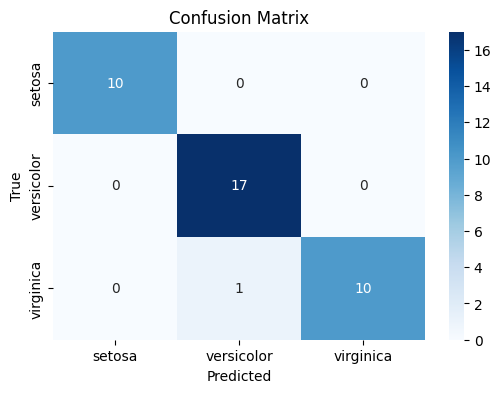

In [61]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], \
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [48]:
accuracy_score(y_test, y_predicted)

0.9736842105263158

In [56]:
print(set(y_test))

{'versicolor', 'setosa', 'virginica'}


In [57]:
recall_score(y_test, y_predicted, average='weighted')

0.9736842105263158

In [58]:
recall_score(y_test, y_predicted, average='macro')

0.9696969696969697

In [59]:
recall_score(y_test, y_predicted, average=None)

array([1.        , 1.        , 0.90909091])

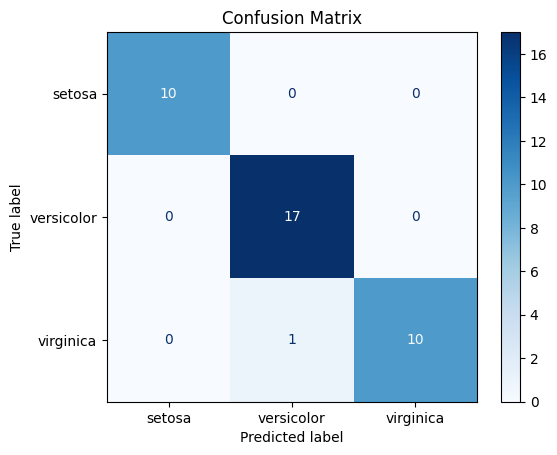

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')

plt.show()

In [62]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [63]:
print(model.best_estimator_.estimators_[0].coef_)

[[ 0.          1.82325212 -4.33666383 -3.13425128]]


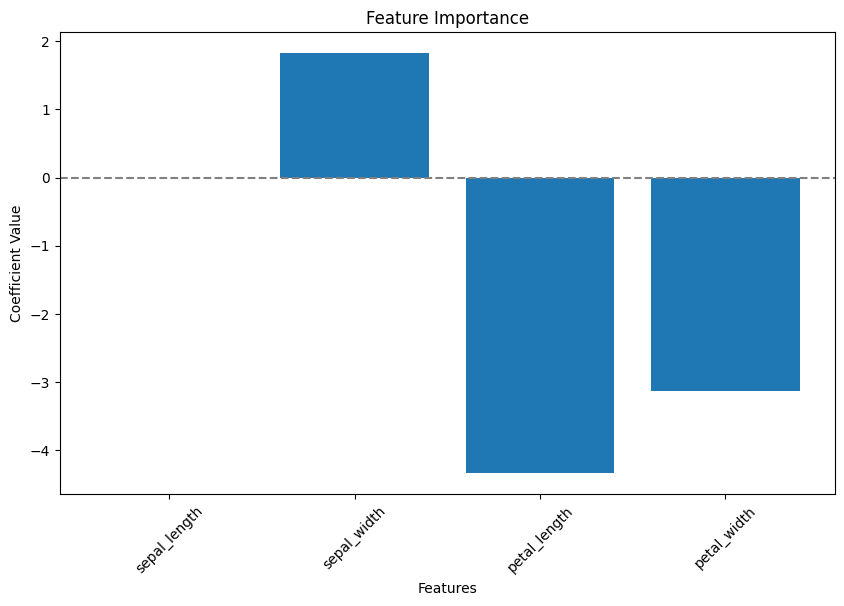

Coefficients: [ 0.          1.82325212 -4.33666383 -3.13425128]
Feature names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Best parameters: {'estimator__C': np.float64(11.28837891684689), 'estimator__penalty': 'l1'}


In [66]:
features = [col for col in df.columns if col != 'species']
coef = model.best_estimator_.estimators_[0].coef_[0]

plt.figure(figsize=(10, 6))
plt.bar(features, coef)
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='grey', linestyle='--')
plt.show()

print("Coefficients:", coef)
print("Feature names:",features)
print("Best parameters:", model.best_params_)

In [67]:
from sklearn.metrics import roc_curve, auc

In [68]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, class_labels=None, figsize=(5, 5)):
    # Получение оценок
    y_score = clf.decision_function(X_test)

    # Проверка данных
    print("Unique labels in y_test:", np.unique(y_test))
    print("Shape of y_score:", y_score.shape)

    # Бинаризация меток
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    if y_test_dummies.shape[1] != n_classes:
        raise ValueError(f"Expected {n_classes} classes, but got {y_test_dummies.shape[1]}")

    # Пустые структуры
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Расчёт ROC и AUC
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Построение графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
    for i in range(n_classes):
        label = class_labels[i] if class_labels else i
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {label}')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curves for Multiclass')
    ax.legend(loc='lower right')
    ax.grid(alpha=0.4)
    plt.show()

Unique labels in y_test: ['setosa' 'versicolor' 'virginica']
Shape of y_score: (38, 3)


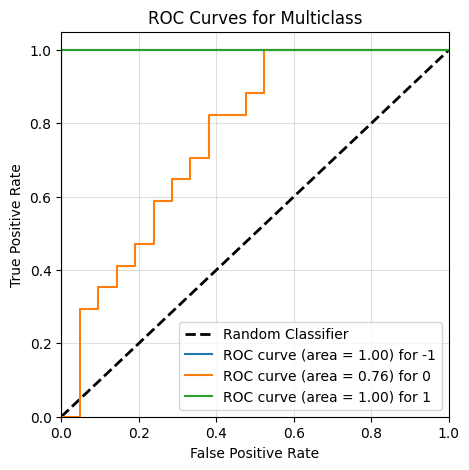

In [69]:
# Построение ROC
plot_multiclass_roc(model, X_test, y_test, n_classes=3, class_labels=[-1, 0, 1])